# Diagnostic Metrics
**Course:** HUDK 4050, Week 10  
**Author:** Zecheng Chang  
**Asignment:** ICE7  
**Objectives:**  
At the end of this ICE, I'll be able to:
1. identify the correct model diagnostic metric(s) for performance
2. implement at least one model diagnostic metric for a model you have built for ACA2 or ACA3

## ACA2

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score
%matplotlib inline

In [55]:
df_rf = pd.read_csv("ICE7.csv",index_col=0).reset_index(drop=True)

df_rf['ONTASK'] =df_rf.apply(lambda x: 1 if x['ONTASK'] == 'Y' else 0,axis=1)

In [56]:
df_rf.head(3)

,GRADE,Gender,OBSNUM,Activity,ONTASK,TRANSITIONS,FORMATchanges,Obsv/act,Transitions/Durations,Total Time
0,2,1,12,Wholecarpet,1,1,1,1390.500000,0.000664,1027
1,3,1,11,Individual,1,2,2,890.333333,0.002545,213
2,0,0,21,Smallgroup,1,3,1,770.500000,0.001439,2078


In [57]:
X_rf = df_rf.drop('ONTASK', axis=1)
y_rf = df_rf['ONTASK']

In [58]:
# split train, test datasets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.1,random_state=33)

In [59]:
cat_trans = make_column_transformer(
            (OneHotEncoder(), ['Activity']),
            remainder="passthrough")

In [60]:
# one_hot = OneHotEncoder()
# norm_num = MinMaxScaler()
rf = RandomForestClassifier(random_state=33)

pipe = Pipeline(steps=[('cat_trans',cat_trans),('rf',rf)])

#pipe.get_params()

In [61]:
gird_params_rf = [{
    'rf__max_depth':[10],
    'rf__min_samples_leaf':[2],
    'rf__min_samples_split':[10],
    'rf__n_estimators':[200]}
]

In [62]:
search = GridSearchCV(pipe, gird_params_rf, n_jobs=-1,cv=10,verbose=2)
search.fit(X_train_rf,y_train_rf)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('cat_trans',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         ['Activity'])])),
                                       ('rf',
                                        RandomForestClassifier(random_state=33))]),
             n_jobs=-1,
             param_grid=[{'rf__max_depth': [10], 'rf__min_samples_leaf': [2],
                          'rf__min_samples_split': [10],
                          'rf__n_estimators': [200]}],
             verbose=2)

In [63]:
y_preds_rf = search.predict(X_test_rf)

rf_accuracy_score = accuracy_score(y_test_rf, y_preds_rf)
print(f"The accuracy of the model is {round(rf_accuracy_score,3)*100} %")

The accuracy of the model is 69.8 %


Firstly, I used accuracy score
Then I plan to use roc-auc score and confusion matrix

In [34]:
y_preds_rf[y_preds_rf=='Y'] = 1
y_preds_rf[y_preds_rf=='N'] = 0

y_test_rf[y_test_rf=='Y'] = 1
y_test_rf[y_test_rf=='N'] = 0

In [42]:
y_test_rf = np.array(y_test_rf)

In [41]:
type(y_preds_rf)

numpy.ndarray

In [65]:
roc_auc_score(y_test_rf, y_preds_rf)

0.5346058652671689

In [66]:
confusion_matrix(y_test_rf, y_preds_rf)

array([[  57,  499],
       [  41, 1190]])

As we can see, there are 499 yes have been incorrectly classified as no  
Also, 41 no have been incorrectly classified as yes

roc_auc score is slightly higher than 0.5, which is not good

## ACA3

same as above, I'll be using confusion matrix and roc_auc socre

In [73]:
df_new = pd.read_csv('ICE7_2.csv', index_col=0)

In [74]:
k_range = range(1,10)

sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df_new.drop(['TUITFTE'],axis=1))
    sse.append(km.inertia_)

In [75]:
sse

[99.00698456497817,
 34.674233056198204,
 24.79560516300642,
 18.2956116955555,
 15.50153238945658,
 14.298135587903325,
 13.284174274106002,
 12.425242159996266,
 11.767221185199132]

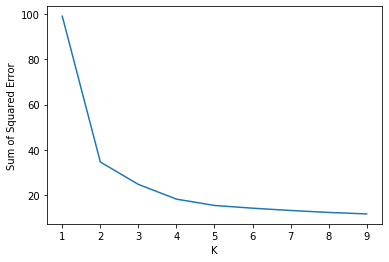

In [76]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.plot(k_range, sse);

For this one, I used elbow method